# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 19 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [ ]:
#Нормальное(гауссовское) распределение с мат. ожиданием 1 и дисперсией 4

In [3]:
norm_distr = np.random.normal(loc = 1.0, scale = 2.0, size = 500)
print("mean = " +str(norm_distr.mean()))
print('min = ' + str(min(norm_distr)))
print('max = ' + str(max(norm_distr)))
print("dispersion = " +str((norm_distr.std())**2))
print("kurtosis = " + str(stats.kurtosis(norm_distr)))
print('skewness = ' + str(stats.skew(norm_distr)))

mean = 1.03713669291
min = -5.52169647526
max = 6.23633211289
dispersion = 3.9109372474
kurtosis = -0.19838638809830922
skewness = -0.1502772478426809


In [ ]:
#распределение хи-квадрат с 3 степенями свободы

In [4]:
chisquare_distr = np.random.chisquare(df = 3, size = 500)
print("mean = " +str(chisquare_distr.mean()))
print('min = ' + str(min(chisquare_distr)))
print('max = ' + str(max(chisquare_distr)))
print("dispersion = " +str((chisquare_distr.std())**2))
print("kurtosis = " + str(stats.kurtosis(chisquare_distr)))
print('skewness = ' + str(stats.skew(chisquare_distr)))

mean = 2.93504633973
min = 0.0619646512681
max = 13.8886510586
dispersion = 5.11608939288
kurtosis = 2.043765293448483
skewness = 1.3462422829972545


In [ ]:
#пуассоновское распределение

In [7]:
pois_distr = np.random.poisson(lam = 10.0, size = 500)
print("mean = " +str(pois_distr.mean()))
print('min = ' + str(min(pois_distr)))
print('max = ' + str(max(pois_distr)))
print("dispersion = " +str((pois_distr.std())**2))
print("kurtosis = " + str(stats.kurtosis(pois_distr)))
print('skewness = ' + str(stats.skew(pois_distr)))

mean = 10.168
min = 2
max = 23
dispersion = 10.379776
kurtosis = 0.31439877295635643
skewness = 0.312424446662475


**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

In [1]:
#нормальное распределение

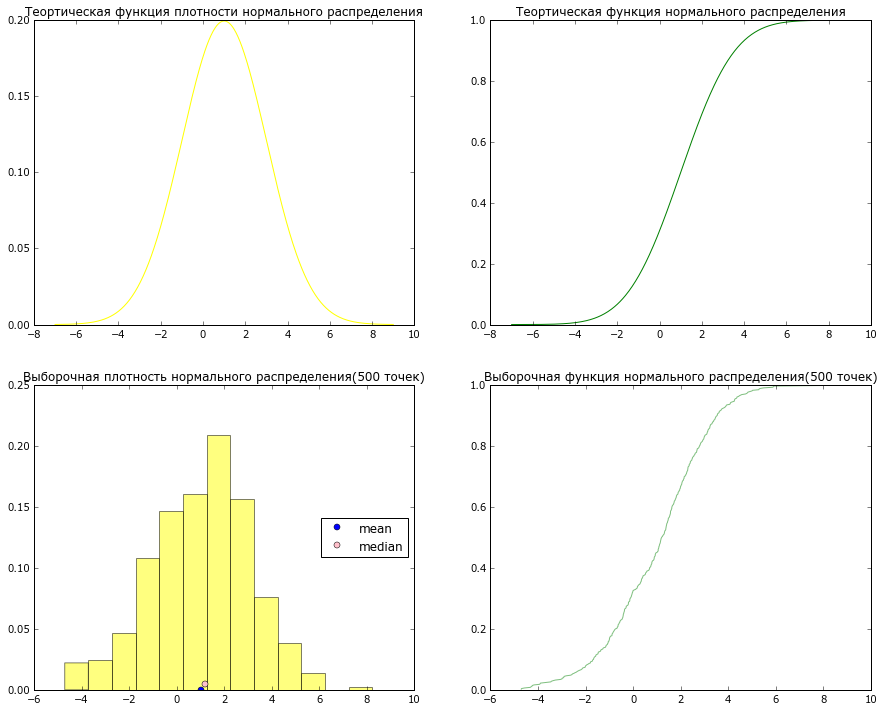

In [157]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,12)
#посмотрим, как должны выглядеть функция и плоность теоретического нормального распределения
x = np.linspace(-7,9, 500)
y1_pdf = stats.norm.pdf(x, 1, 2)
y2_cdf = stats.norm.cdf(x, 1, 2)
ax[0][0].plot(x,y1_pdf, color = 'yellow')
ax[0][1].plot(x, y2_cdf, color = 'green' )
ax[0][0].set_title(u'Теортическая функция плотности нормального распределения')
ax[0][1].set_title(u'Теортическая функция нормального распределения')

#посмотрим, как в действительности распределены 500 точек, которые мы сгенерировали ранее
sorted_norm = np.sort(norm_distr)
cumulative_distr = np.zeros(len(norm_distr), dtype=float)
for i in range(len(norm_distr)):
    cumulative_distr[i] = (i + 1)/len(norm_distr)
ax[1][0].hist(norm_distr, bins = 13, color = "yellow", alpha = 0.5, normed= True)
ax[1][1].plot(sorted_norm, cumulative_distr, color = 'green', alpha = 0.5)
ax[1][0].plot(norm_distr.mean(),0,'ro', color="blue",label='mean')
ax[1][0].plot(np.median(norm_distr),0.005,'ro', color="pink",label='median')
ax[1][0].legend(loc = 5, numpoints= 1)
ax[1][0].set_title(u'Выборочная плотность нормального распределения(500 точек)')
ax[1][1].set_title(u'Выборочная функция нормального распределения(500 точек)')

In [ ]:
#распределение хи-квадрат

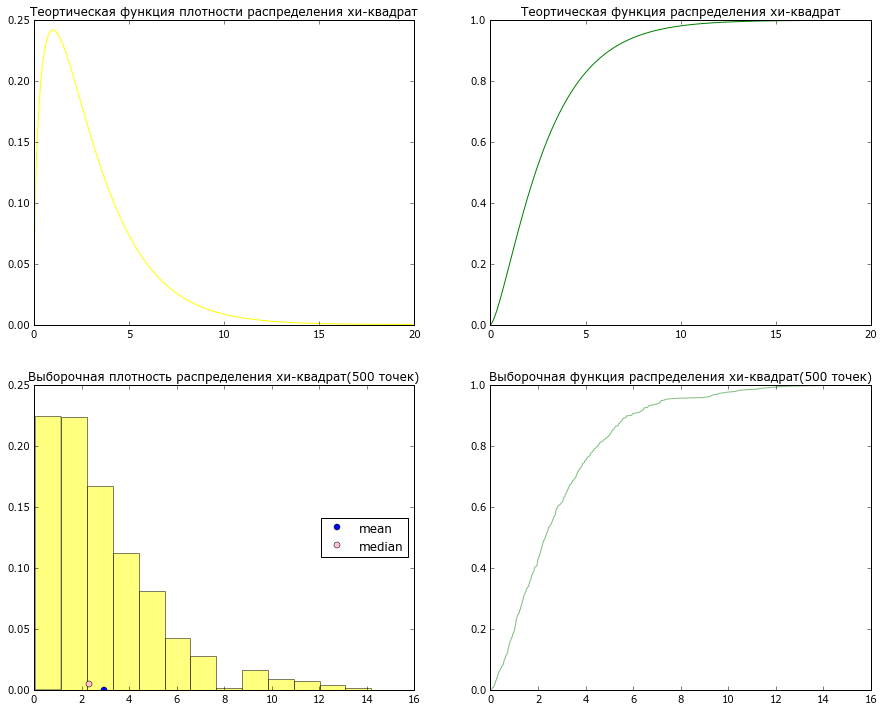

In [158]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,12)
#посмотрим, как должны выглядеть функция и плоность теоретического распределения хи-квадрат
x = np.linspace(0,20, 500)
y1_pdf = stats.chi2.pdf(x, df = 3)
y2_cdf = stats.chi2.cdf(x, df = 3)
ax[0][0].plot(x,y1_pdf, color = 'yellow')
ax[0][1].plot(x, y2_cdf, color = 'green' )
ax[0][0].set_title(u'Теортическая функция плотности распределения хи-квадрат')
ax[0][1].set_title(u'Теортическая функция распределения хи-квадрат')

#посмотрим, как в действительности распределены 500 точек, которые мы сгенерировали ранее
sorted_chisquare = np.sort(chisquare_distr)
cumulative_distr = np.zeros(len(chisquare_distr), dtype=float)
for i in range(len(chisquare_distr)):
    cumulative_distr[i] = (i + 1)/len(chisquare_distr)
ax[1][0].hist(chisquare_distr, bins = 13, color = "yellow", alpha = 0.5, normed= True)
ax[1][1].plot(sorted_chisquare, cumulative_distr, color = 'green', alpha = 0.5)
ax[1][0].plot(chisquare_distr.mean(),0,'ro', color="blue",label='mean')
ax[1][0].plot(np.median(chisquare_distr),0.005,'ro', color="pink",label='median')
ax[1][0].legend(loc = 5, numpoints= 1)
ax[1][0].set_title(u'Выборочная плотность распределения хи-квадрат(500 точек)')
ax[1][1].set_title(u'Выборочная функция распределения хи-квадрат(500 точек)')

In [ ]:
#Пуассоновское распределение

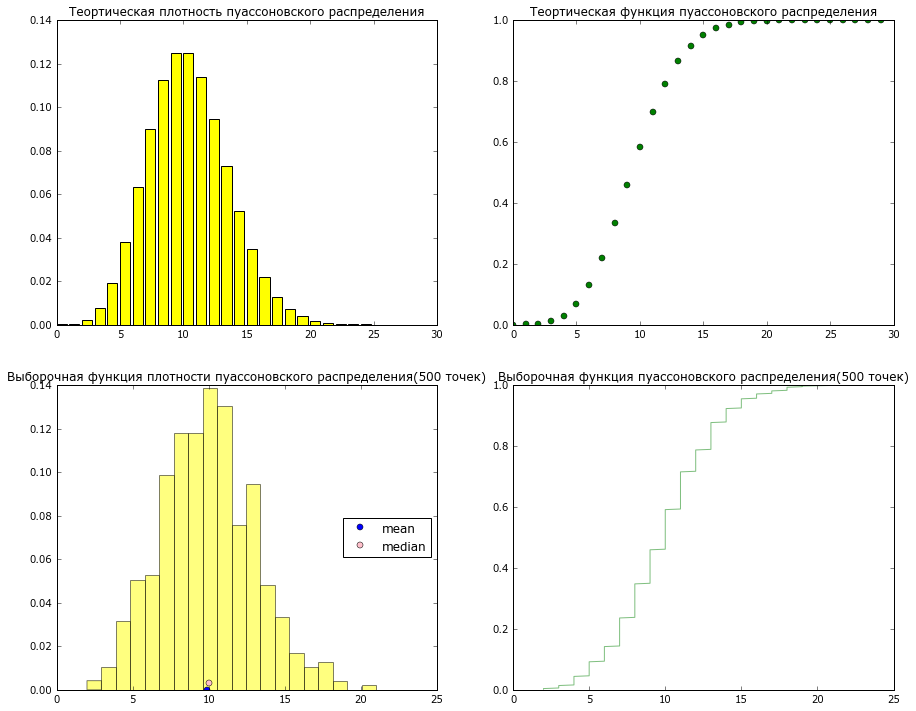

In [149]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,12)
#посмотрим, как должны выглядеть функция и плоность теоретического пуассоновского распределения
#так как это распределение дискретно,альтернативой плтности являются "веса" лежащие в целых точках
#также функция распределения дискретна
lam = 10
x = np.arange(0,30)
y1_pdf = stats.poisson.pmf(x, lam)
y2_cdf = stats.poisson.cdf(x,lam)
ax[0][0].bar(x,y1_pdf, color = 'yellow')
ax[0][1].plot(x, y2_cdf,'ro', color = 'green' )
ax[0][0].set_title(u'Теортическая плотность пуассоновского распределения')
ax[0][1].set_title(u'Теортическая функция пуассоновского распределения')

#посмотрим, как в действительности распределены 500 точек, которые мы сгенерировали ранее
sorted_pois = np.sort(pois_distr)
cumulative_distr = np.zeros(len(pois_distr), dtype=float)
for i in range(len(pois_distr)):
    cumulative_distr[i] = (i + 1)/len(pois_distr)
ax[1][0].hist(pois_distr, bins = 20, color = "yellow", alpha = 0.5, normed= True)
ax[1][1].plot(sorted_pois, cumulative_distr, color = 'green', alpha = 0.5)
ax[1][0].plot(pois_distr.mean(),0,'ro', color="blue",label='mean')
ax[1][0].plot(np.median(pois_distr),0.003,'ro', color="pink",label='median')
ax[1][0].legend(loc = 5, numpoints= 1)
ax[1][0].set_title(u'Выборочная функция плотности пуассоновского распределения(500 точек)')
ax[1][1].set_title(u'Выборочная функция пуассоновского распределения(500 точек)')

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [ ]:
#статистика по сгенерированному нормальному распределению

In [280]:
print("Normal distribution")
print(sp.stats.describe(norm_distr))

Normal distribution
DescribeResult(nobs=500, minmax=(-4.7064439040379531, 8.2234851731966678), mean=1.0231407931264462, variance=4.3192684476447267, skewness=-0.22701153219312398, kurtosis=0.045371894004007096)


In [ ]:
#статистика по сгенерированному распределению хи-квадрат

In [279]:
print("Chi-square distribution")
print(sp.stats.describe(chisquare_distr))

Chi-square distribution
DescribeResult(nobs=500, minmax=(0.055393876559284273, 14.18694300410327), mean=2.9269915790111822, variance=5.6722061059503055, skewness=1.5873250945778359, kurtosis=3.0744319397264688)


In [ ]:
#статистика по сгенерированному пуассоновскому распределению

In [278]:
print("Poisson distribution")
print(sp.stats.describe(pois_distr))

Poisson distribution
DescribeResult(nobs=500, minmax=(2, 21), mean=9.8620000000000001, variance=10.391739478957914, skewness=0.2477410814461277, kurtosis=0.019243667114650975)


## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

In [ ]:
#Коэффициент корреляции Пирсона указывает на линейную связь между данными
#если он равен 1, данные линейно связаны с постоянным положительным коэффициентом пропорциональности
#рост значений одних данных приводит к пропорциональному росту значений других
#если он равен -1, данные линейно связаны с постоянным отрицательным коэффициентом пропорциональности
#рост значений одних данных приводит к пропорциональному уменьшению значений других
#если он равен 0, зависимость не выявлена

#Коэффициент корреляции Спирмена указывает на монотонную связь между данными
#если он равен 1, данные положительно монотонно связанны
#рост значений одних данных приводит к росту значений других(необязательно пропорциональному)
#если он равен -1, данные линейно зависимы с постоянным отрицательным коэффициентом пропорциональности
#рост значений одних данных приводит к уменьшению значений других(необязательно пропорциональному)
#если он равен 0, зависимость не выявлена

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [2]:
#чтобы красиво отображались данные
from IPython.core.display import display

In [3]:
#посмотрим, какие данные находятся в таблице
df = pd.read_csv('beauty.csv', sep = ';')
display(df.head())

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [4]:
#признаки, по которым будем искать корреляцию
features = list(df.columns)

#найдем корреляцию для каждой пары признаков для этого будем использовать коэффициент корреляции Пирсона
corr_matrix = []
for i in range(len(features)):
    const_feature = []
    for j in range(len(features)):
        correlation = abs(stats.pearsonr(df[features[i]],df[features[j]])[0])
        const_feature.append(correlation)
    corr_matrix.append(const_feature)

#найдем самую сильную корреляцию
j_max1 = 0
value_max1 = 0
for i in range(len(features)):
    for j in range(len(features)):
        if (corr_matrix[i][j] > value_max1) and (corr_matrix[i][j] != 1) :
            value_max1 = corr_matrix[i][j]
            i_max1 = i
            j_max1 = j
print("the most significant corr is between " + str(features[i_max1]) + " and " + str(features[j_max1]) + ":")
print(stats.pearsonr(df[features[i_max1]],df[features[j_max1]])[0])

i_max2 = 0
j_max2 = 0
value_max2 = 0
for i in range(len(features)):
    for j in range(len(features)):
        if (corr_matrix[i][j] > value_max2) and (corr_matrix[i][j] != 1) and (corr_matrix[i][j] != value_max1):
            value_max2 = corr_matrix[i][j]
            i_max2= i
            j_max2 = j
print("2 place significant corr is between " + str(features[i_max2]) +  " and " + str(features[j_max2]) + " :")
print(stats.pearsonr(df[features[i_max2]],df[features[j_max2]])[0])

i_max3 = 0
j_max3 = 0
value_max3 = 0
for i in range(len(features)):
    for j in range(len(features)):
        if (corr_matrix[i][j] > value_max3) and (corr_matrix[i][j] != 1) and \
            (corr_matrix[i][j] != value_max1) and (corr_matrix[i][j] != value_max2):
            value_max3 = corr_matrix[i][j]
            i_max3= i
            j_max3 = j
print("3 place significant corr is between " + str(features[i_max3]) +  " and " + str(features[j_max3]) + " :")
print(stats.pearsonr(df[features[i_max3]],df[features[j_max3]])[0])

the most significant corr is between female and married:
-0.319227934398
2 place significant corr is between wage and female :
-0.313419441587
3 place significant corr is between service and educ :
0.301628474412


In [ ]:
#первые два коэффцииента корреляции объясняются таким образом:
# между (female и married) или (wage и female) нет линейной зависимости,
#но есть отрицательная зависимость
#то есть при возрастании одного значения параметра, другой чаще всего уменьшается

#последний коэффцииент корреляции объясняется таким образом:
# между (service and educ) нет линейной зависимости,
#но есть положительная зависимость,
#то есть при возрастании одного значения параметра, другой также чаще всего увеличивается

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

In [245]:
print(features)

['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married', 'service', 'educ', 'looks']


In [ ]:
#распределение зарплаты

DescribeResult(nobs=1260, minmax=(1.02, 77.719999999999999), mean=6.3066904761904752, variance=21.721556234539882, skewness=4.813465447482802, kurtosis=51.013410015044414)

expon mean is 5.28668933293
norm mean is 6.30669047619
rayleigh mean is 5.78519509167
cauchy mean is 5.06007985406


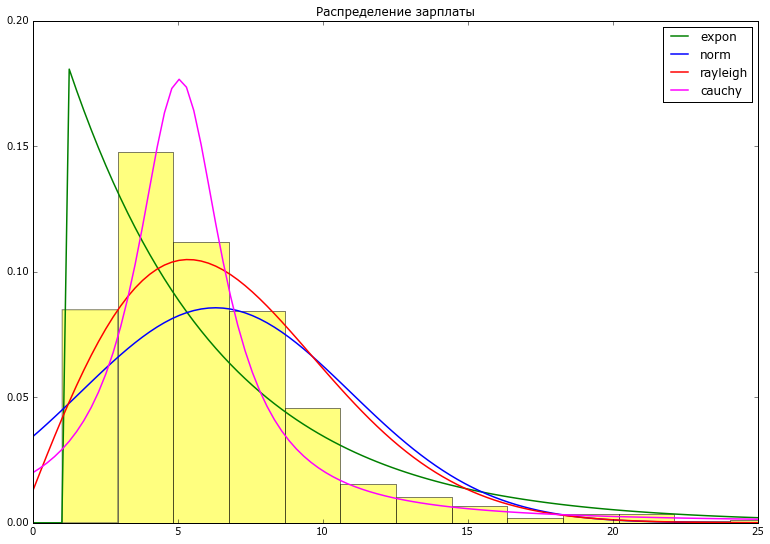

In [11]:
from scipy.stats import norm, expon, gamma, rayleigh, beta, cauchy

def find_distr_and_draw_plots(data, xlims, bins, distrs, figsize = (13,9), title = 'default'):
    plt.figure(figsize = figsize)
    plt.xlim(xlims)
    plt.title(title)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    plt.hist(data, bins = bins, normed = True, color = '#ffff00', alpha = 0.5)
    code = '\
global params;\
params = stats.{0}.fit(data); \
p = stats.{0}.pdf(x, *params[-2:]); \
plt.plot(x, p, \'k\', linewidth=1.5, label = \'{0}\', color = \'{1}\'); \
    '
    colors = ['g', 'b', 'r', 'magenta', 'cyan', 'black']
    for dist, color in zip(dists, colors):
        exec(code.format(dist, color))
        print(dist, 'mean is', params[1] if dist in ['rayleigh', 'halfcauchy', 'gilbrat', 'expon'] else params[0])
        #print(params)
    plt.legend()
    plt.show()

    
display(stats.describe(df['wage']))
dists = ['expon', 'norm', 'rayleigh', 'cauchy']
find_distr_and_draw_plots(df['wage'], (0, 25), 40, dists, title = 'Распределение зарплаты')

In [ ]:
#распределение опыта работы

DescribeResult(nobs=1260, minmax=(0, 48), mean=18.206349206349206, variance=143.12497951258871, skewness=0.5654052848044664, kurtosis=-0.7491921833011848)

expon mean is 18.2063661053
gilbrat mean is 14.2099683524
halfcauchy mean is 14.6832435778
rayleigh mean is 16.9923326053


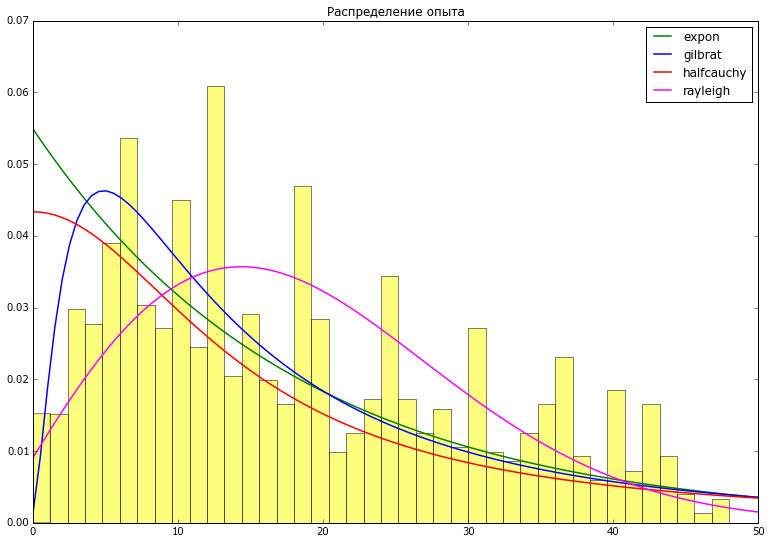

In [12]:
display(stats.describe(df['exper']))
dists = ['expon', 'gilbrat', 'halfcauchy', 'rayleigh']
find_distr_and_draw_plots(df['exper'], (0, 50), 40, dists, title = 'Распределение опыта')

In [ ]:
#распределение членства в профсоюзе

Распределение Бернулли с параметрами (1, 0.272222222222)


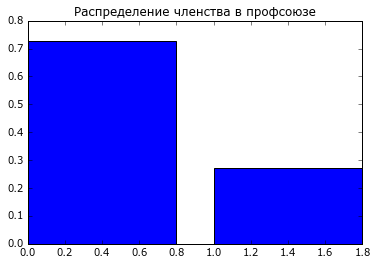

In [27]:
#по данным видно, что это распределение Бернулли
pdf  = df['union'].value_counts().divide(1260).sort_index()
plt.bar([0,1], pdf)
print("Распределение Бернулли с параметрами (1, " + str(pdf[1]) + ')')
plt.title(u'Распределение членства в профсоюзе')


In [ ]:
#распределение по здоровью

Распределение Бернулли с параметрами (1, 0.933333333333)


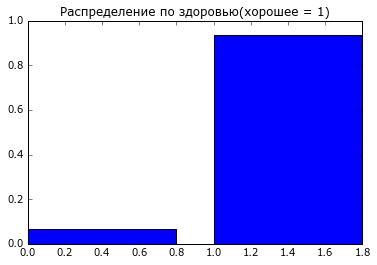

In [28]:
#по данным видно, что это распределение Бернулли
pdf  = df['goodhlth'].value_counts().divide(1260).sort_index()
plt.bar([0,1], pdf)
print("Распределение Бернулли с параметрами (1, " + str(pdf[1]) + ')')
plt.title(u'Распределение по здоровью(хорошее = 1)')

In [ ]:
#распределение по цвету кожи(черный цвет = 1)

Распределение Бернулли с параметрами (1, 0.0738095238095)


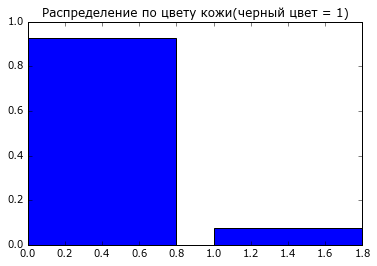

In [30]:
#по данным видно, что это распределение Бернулли
pdf  = df['black'].value_counts().divide(1260).sort_index()
plt.bar([0,1], pdf)
print("Распределение Бернулли с параметрами (1, " + str(pdf[1]) + ')')
plt.title(u'Распределение по цвету кожи(черный цвет = 1)')

In [ ]:
#распределение по полу(женщина = 1)

Распределение Бернулли с параметрами (1, 0.346031746032)


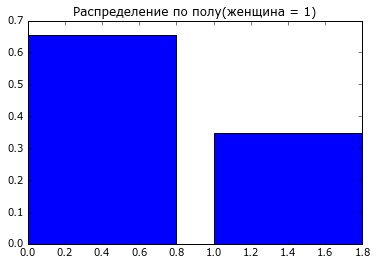

In [34]:
#по данным видно, что это распределение Бернулли
pdf  = df['female'].value_counts().divide(1260).sort_index()
plt.bar([0,1], pdf)
print("Распределение Бернулли с параметрами (1, " + str(pdf[1]) + ')')
plt.title(u'Распределение по полу(женщина = 1)')

In [ ]:
#распределение по семейному положению

Распределение Бернулли с параметрами (1, 0.69126984127)


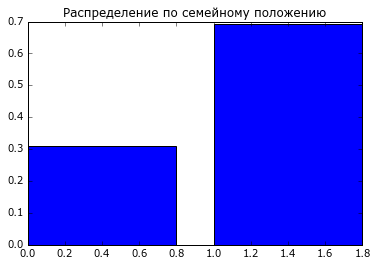

In [33]:
#по данным видно, что это распределение Бернулли
pdf  = df['married'].value_counts().divide(1260).sort_index()
plt.bar([0,1], pdf)
print("Распределение Бернулли с параметрами (1, " + str(pdf[1]) + ')')
plt.title(u'Распределение по семейному положению')

In [ ]:
#распределение занятости в сфере услуг

Распределение Бернулли с параметрами (1, 0.27380952381)


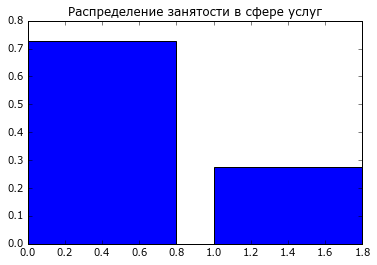

In [35]:
#по данным видно, что это распределение Бернулли
pdf  = df['service'].value_counts().divide(1260).sort_index()
plt.bar([0,1], pdf)
print("Распределение Бернулли с параметрами (1, " + str(pdf[1]) + ')')
plt.title(u'Распределение занятости в сфере услуг')

In [ ]:
#распеделение количества лет образования

DescribeResult(nobs=1260, minmax=(5, 17), mean=12.563492063492063, variance=6.8879433160608707, skewness=-0.37173603705025887, kurtosis=0.8796442180406299)

norm mean is 12.5634920635
laplace mean is 12.0000000158
cauchy mean is 12.2670567468


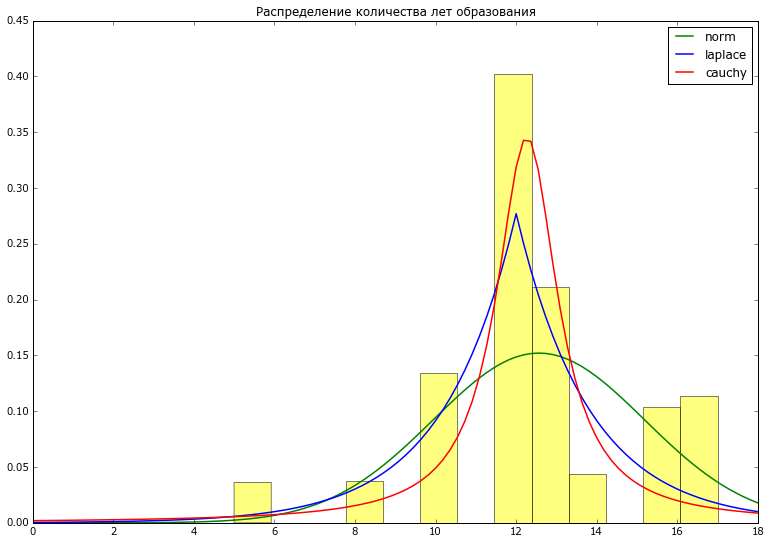

In [9]:
display(stats.describe(df['educ']))
dists = ['norm', 'laplace', 'cauchy']
find_distr_and_draw_plots(df['educ'], (0,18), 13, dists, title = 'Распределение количества лет образования')

In [ ]:
#распределение оценки внешности

DescribeResult(nobs=1260, minmax=(1, 5), mean=3.1857142857142855, variance=0.46905707477589931, skewness=-0.16593911083266713, kurtosis=0.411144254069042)

norm mean is 3.18571428571
laplace mean is 2.99999999033


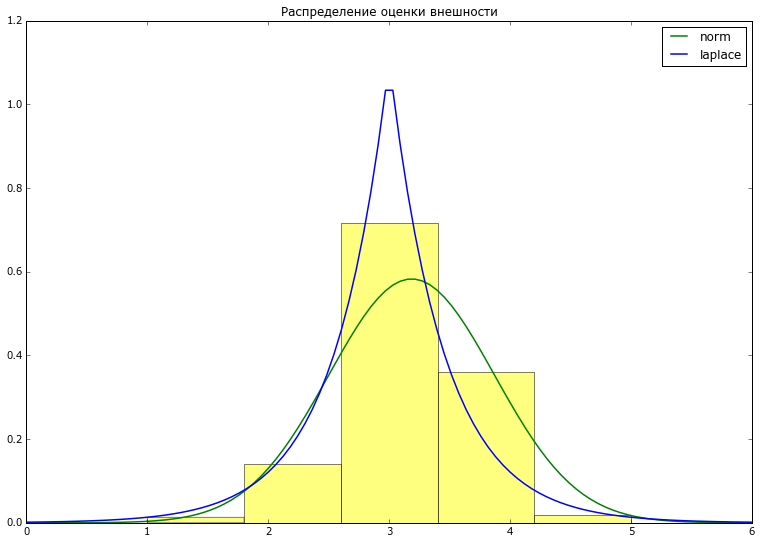

In [10]:
display(stats.describe(df['looks']))
#pdf  = df['looks'].value_counts().divide(1260).sort_index()
#plt.bar(range(1,6), pdf)
dists = ['norm', 'laplace']
find_distr_and_draw_plots(df['looks'], (0,6), 5, dists, title = 'Распределение оценки внешности')

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [ ]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#скачаем все тексты по темам 'sci.space' и 'alt.atheism'

In [4]:
text_all = fetch_20newsgroups(subset='all', categories=['sci.space', 'alt.atheism'])

In [15]:
#разобьем наборы текстов и тем на 2 выборки(обучающую и тестовую)

In [5]:
text_train, text_test, y_train, y_test = train_test_split(text_all.data,text_all.target,test_size = 0.3)

In [17]:
#в переменной y_train(test) содержатся 0 или 1, в зависимости от того, какой теме соотвествует текст
#0 для 'alt.atheism', 1 для 'sci.space'

**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [6]:
#сторим конвертер
text = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)

In [19]:
#заполняем словарь конвертера

In [7]:
text.fit(text_all.data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [8]:
X_train = text.transform(text_train)
X_test  = text.transform(text_test)

In [22]:
#выясним некоротрые характеристики получившихся матриц

In [9]:
print(X_train.size)
print(X_train.shape)
print(X_test.size)
print(X_test.shape)
type(X_train)

151965
(1250, 28078)
65184
(536, 28078)


scipy.sparse.csr.csr_matrix

**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [10]:
#посмотрим сколько всего различных слов встречается в нашем тексте
words_quantity = max(X_train.indices) + 1
words_quantity

28078

In [11]:
#посчитаем сколько раз каждое слово встречается во всех текстах для обучения
sum_for_each_words = X_train.sum(axis = 0).tolist()[0]

In [12]:
#найдем топ-50 самых частотных слов
df1 = pd.DataFrame({'words_frequesy':sum_for_each_words, 'indices' : np.arange(words_quantity)}).sort_values('words_frequesy',ascending=False)
df1 = df1[:50]

In [13]:
#выведем сколько раз встречаются слова во всех тренировочных текстах 
for r in df1.iterrows():
    print("слово " + str(text.get_feature_names()[r[1][0]]) + " встречается " + str(r[1][1]) + " раз")

слово edu встречается 2724 раз
слово space встречается 1378 раз
слово subject встречается 1373 раз
слово lines встречается 1304 раз
слово organization встречается 1238 раз
слово com встречается 1190 раз
слово writes встречается 1185 раз
слово article встречается 961 раз
слово god встречается 817 раз
слово don встречается 815 раз
слово people встречается 799 раз
слово just встречается 778 раз
слово like встречается 740 раз
слово posting встречается 719 раз
слово nasa встречается 681 раз
слово think встречается 667 раз
слово host встречается 596 раз
слово nntp встречается 591 раз
слово does встречается 584 раз
слово know встречается 582 раз
слово time встречается 538 раз
слово say встречается 524 раз
слово university встречается 508 раз
слово earth встречается 447 раз
слово way встречается 442 раз
слово world встречается 421 раз
слово make встречается 399 раз
слово believe встречается 385 раз
слово launch встречается 382 раз
слово gov встречается 373 раз
слово said встречается 372 раз
сл

**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром сглаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [15]:
from sklearn.metrics import roc_auc_score

classifier = MultinomialNB(alpha = 1)
training = classifier.fit(X_train, y_train)
result = training.predict(X_test)
print("Точность совпадения меток = " + str(roc_auc_score(result, y_test)))

Точность совпадения меток = 0.994983277592


**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [17]:
classifier = MultinomialNB(alpha = 0)
training = classifier.fit(X_train, y_train)
result = training.predict(X_test)
print("Точность совпадения меток = " + str(roc_auc_score(result, y_test)))
print()

def test_proba(alpha, precision):
    print('testing for alpha is {}..'.format(alpha))
    global X_test
    classifier = MultinomialNB(alpha = alpha)
    training = classifier.fit(X_train, y_train)
    result = training.predict(X_test)
    result = training.predict_proba(X_test)
    counter = 0
    for stri in result:
        if (str(stri[0]) != 'nan' and str(stri[1]) != 'nan') and \
            (stri[0]) > precision and (stri[0] < 1 - precision):
            print(str(stri), ' found')
            counter += 1
    if counter == 0:
        print('result: nans, 0s, 1s')
    else:
        print('result: {0} ok str found\n\n'.format(counter))
    

test_proba(0, 0.000001)
print('\nКак показал цикл сверху, при alpha = 0 все значения nan, 0 или 1, а значит результат predict_proba\
 если и определен на\n некоторых данных, то не толичается от predict. (Точность 0.000001)\n')
print('Проверим то же для alpha = 1 и alpha = 0.5 (здесь возьмем точность в 0.1%)\n')

test_proba(1, 0.001)

test_proba(0.5, 0.001)

print('Строки, для которых вероятности отличны от (1,0) встречаются очень редко, \
а значит смысл оценивать результаты вероятностями нет.')



Точность совпадения меток = 0.738095238095

testing for alpha is 0..
result: nans, 0s, 1s

Как показал цикл сверху, при alpha = 0 все значения nan, 0 или 1, а значит результат predict_proba если и определен на
 некоторых данных, то не толичается от predict. (Точность 0.000001)

Проверим то же для alpha = 1 и alpha = 0.5 (здесь возьмем точность в 0.1%)

testing for alpha is 1..
[ 0.00122935  0.99877065]  found
[ 0.00105287  0.99894713]  found
[ 0.2578308  0.7421692]  found
[ 0.97619051  0.02380949]  found
result: 4 ok str found


testing for alpha is 0.5..
[ 0.00126549  0.99873451]  found
[ 0.21247425  0.78752575]  found
[ 0.99842791  0.00157209]  found
result: 3 ok str found


Строки, для которых вероятности отличны от (1,0) встречаются очень редко, а значит смысл оценивать результаты вероятностями нет.
